In [77]:
import pymongo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [78]:
# MongoDB connection
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['Hawaii_DB']
collection = db['Hawaii_Hotels']


In [79]:
#print JSON
all_hotels = collection.find().limit(5)

for hotel in all_hotels:
      print(hotel)

{'_id': ObjectId('6698d9b7ed81992747f3403d'), 'Name': 'Halepuna Waikiki by Halekulani', 'Price': '$$', 'Address': '2233 Helumoa Rd, Honolulu, HI 96815', 'Latitude': 21.2782175558293, 'Longitude': -157.830784438082, 'Image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/vO480Og6OMv-i2F8IWEkVw/o.jpg', 'Rating': 4.6, 'Review_Count': 75}
{'_id': ObjectId('6698d9b7ed81992747f3403e'), 'Name': 'The Ritz-Carlton Residences, Waikiki Beach', 'Price': '$$$$', 'Address': '383 Kalaimoku St, Waikiki Beach, HI 96815', 'Latitude': 21.282751200942293, 'Longitude': -157.8303651452476, 'Image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/lVOB_6pF2pz-_3KCYevkyw/o.jpg', 'Rating': 4.5, 'Review_Count': 248}
{'_id': ObjectId('6698d9b7ed81992747f3403f'), 'Name': 'Halekulani Hotel', 'Price': '$$$', 'Address': '2199 Kalia Rd, Honolulu, HI 96815', 'Latitude': 21.278256379128212, 'Longitude': -157.83180252933633, 'Image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/ab0Cs0sdkXSahkgGK0H-qw/o.jpg', 'Rating': 4.5, 'R

In [80]:
# Fetch top 5 hotels based on rating
# top_hotels = collection.find().sort("Rating", -1).limit(5)

In [81]:
# Get all hotels
all_hotels = collection.find().limit(20)

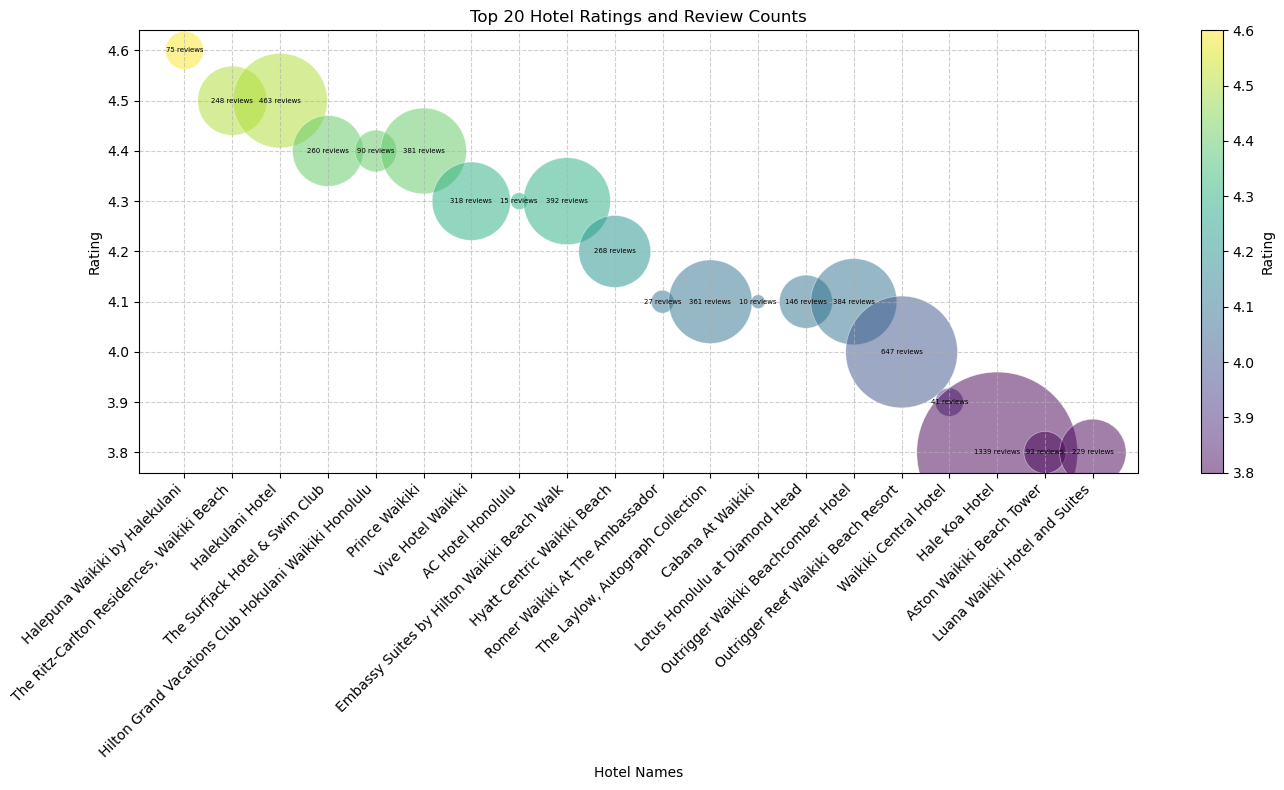

In [82]:
# Extract data for visualization
hotel_names = []
hotel_ratings = []
review_counts = []

for hotel in all_hotels:
    try:
        hotel_names.append(hotel['Name'])
        hotel_ratings.append(hotel['Rating'])
        review_counts.append(hotel['Review_Count'])
    except KeyError:
        # Skip hotels with missing data
        continue

#Check if lengths of the lists match
assert len(hotel_names) == len(hotel_ratings) == len(review_counts), "Lengths of hotel data lists do not match"

# Normalize the ratings for colormap
norm = plt.Normalize(min(hotel_ratings), max(hotel_ratings))
colors = plt.cm.viridis(norm(hotel_ratings))

# Create a bubble chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(hotel_names, hotel_ratings, s=[count*10 for count in review_counts], c=hotel_ratings, cmap='viridis', alpha=0.5, edgecolors="w", linewidth=0.5)
plt.xlabel('Hotel Names')
plt.ylabel('Rating')
plt.title('Top 20 Hotel Ratings and Review Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Rating')

# Adding annotations for better readability
for i, name in enumerate(hotel_names):
    plt.text(i, hotel_ratings[i], f'{review_counts[i]} reviews', fontsize=5, ha='center', va='center')

plt.show()